# EDA OF SALARY PREDICTION DATA


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
salary_eda= pd.read_csv('semicleaned_salary_data.csv')

In [136]:
salary_eda.head()

,Unnamed: 0,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year of Birth,personality score,aptitude score
0,0,f,87.80,cbse,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,...,8.472776,6.341575,8.014805,8.636471,4.651655,0.2889,445000,1990,7.085299,7.814026
1,1,m,57.00,cbse,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,...,6.711875,8.536664,7.581573,8.636471,5.285964,-0.2859,110000,1990,7.367186,2.964951
2,2,m,77.33,"maharashtra state board,pune",85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,...,9.123741,7.477669,7.361574,9.084819,3.924277,-0.2875,255000,1989,7.499946,4.663684
3,3,m,84.30,cbse,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,...,9.950490,5.853683,7.798189,7.272794,4.863147,0.4805,420000,1991,6.515380,6.936067
4,4,f,82.00,cbse,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,...,6.392573,4.065652,6.549620,5.221660,4.512101,0.1864,200000,1990,5.331208,4.608160


Let us see the distribution of salary w.r.t gender

<Axes: xlabel='Gender', ylabel='Salary'>

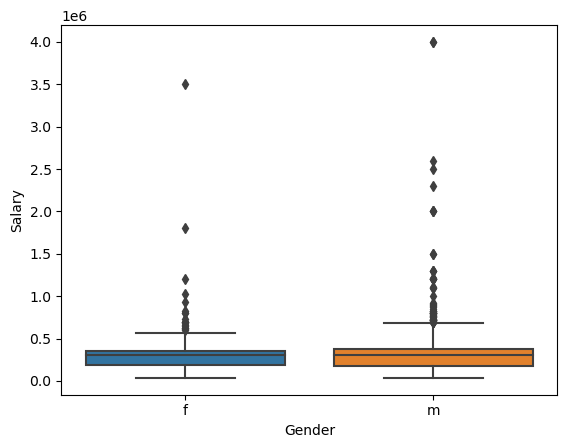

In [137]:
sns.boxplot(x='Gender',y='Salary',data=salary_eda)

Let us see the distribution of salary w.r.t different aptitude parameters

In [138]:
aptitude_params = ['English','Logical','Quant','aptitude score']

<Axes: xlabel='English', ylabel='Salary'>

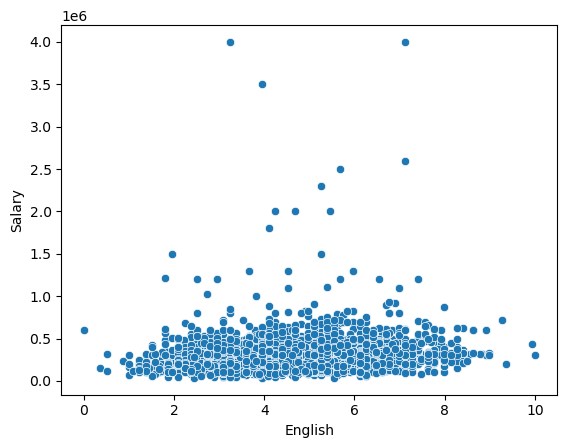

In [139]:
sns.scatterplot(data=salary_eda,x='English',y='Salary')

<Axes: xlabel='Logical', ylabel='Salary'>

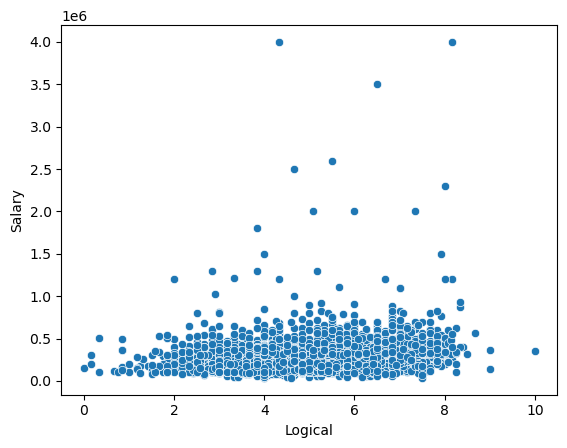

In [140]:
sns.scatterplot(data=salary_eda,x='Logical',y='Salary')

<Axes: xlabel='Quant', ylabel='Salary'>

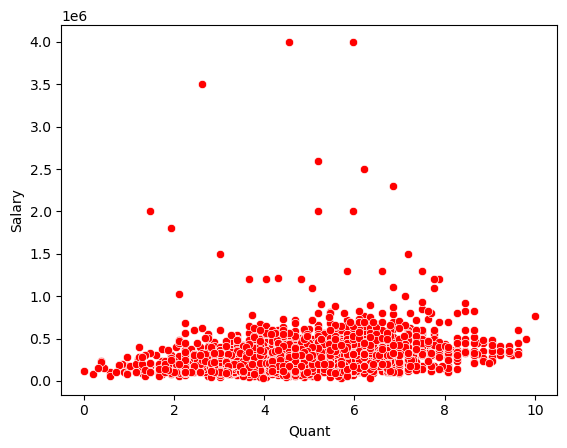

In [141]:
sns.scatterplot(data=salary_eda,x='Quant',y='Salary',color='r')

<Axes: xlabel='aptitude score', ylabel='Salary'>

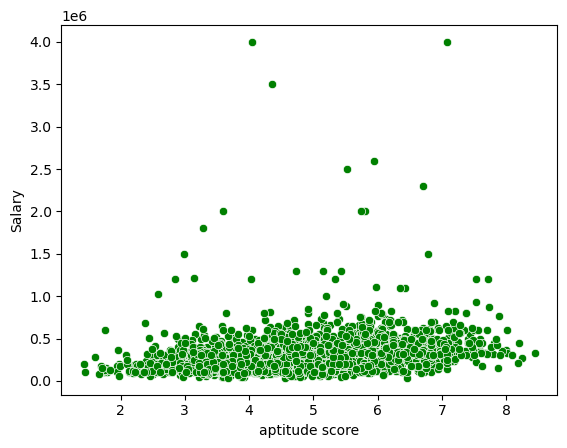

In [142]:
sns.scatterplot(data=salary_eda,x='aptitude score',y='Salary',color='g')

We can see that the graph for all the 3 aptitude parameters is the same 
So,in order to avoid too many paramter we will use the combined paramater for all the 3 i.e. aptitude score

Similarly,
Let us check the variation of salary w.r.t the paramaters: conscientiousness,agreeableness,extraversion and nueroticism

<Axes: xlabel='conscientiousness', ylabel='Salary'>

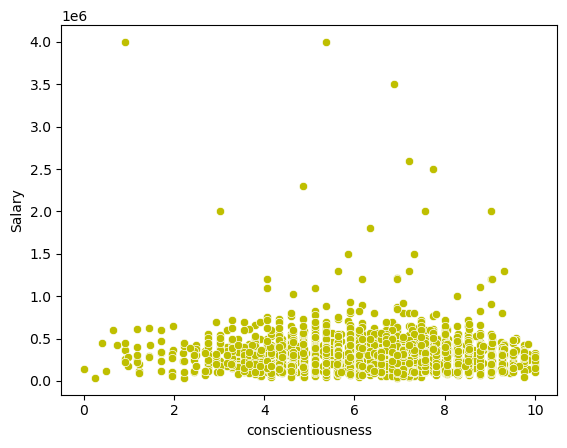

In [143]:
sns.scatterplot(data=salary_eda,x='conscientiousness',y='Salary',color='y')

<Axes: xlabel='nueroticism', ylabel='Salary'>

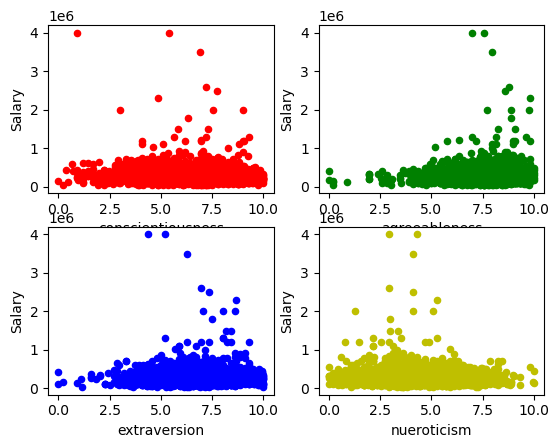

In [144]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

salary_eda.plot(kind='scatter',x='conscientiousness',y='Salary',color='r',ax=ax0)
salary_eda.plot(kind='scatter',x='agreeableness',y='Salary',color='g',ax=ax1)
salary_eda.plot(kind='scatter',x='extraversion',y='Salary',color='b',ax=ax2)
salary_eda.plot(kind='scatter',x='nueroticism',y='Salary',color='y',ax=ax3)



Here,if we observe higher values of conscientiousness,agreeableness and extraversion may lead lead to higher salaries.
Whereas lower values of nueroticism may lead to higher salary

Now, in order to avoid a lot of features for our model we may combine these 4 features into a single feature 'personality score'


## Personality Score = (Conscientiousness + Agreeableness + Extraversion + 10 - Neuroticism)

This change is already being made in the firststepcleaning file

<Axes: xlabel='personality score', ylabel='Salary'>

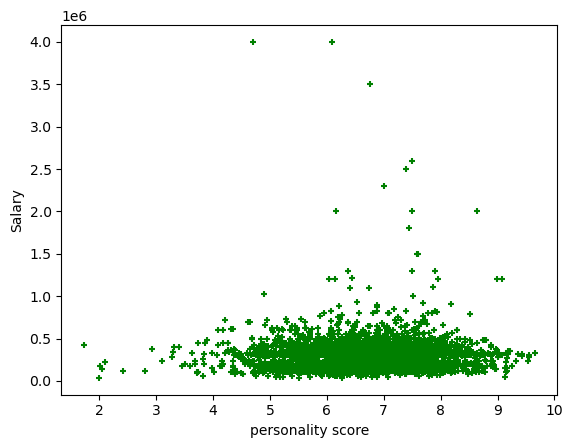

In [145]:
salary_eda.plot(kind='scatter',x='personality score',y='Salary',color='g',marker='+')

Now let us see the scatter plot for 10th,12th percentage and college GPA with salary

<Axes: xlabel='collegeGPA', ylabel='Salary'>

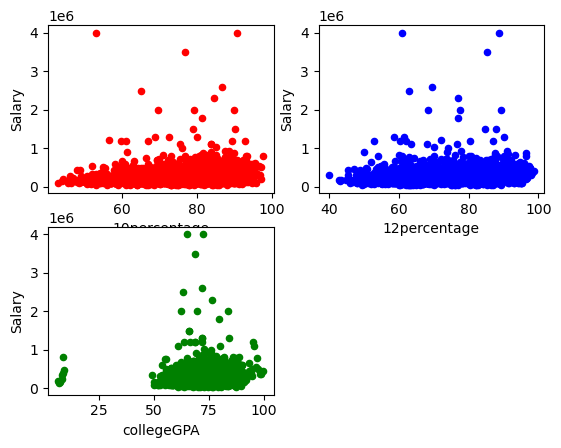

In [146]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)


salary_eda.plot(kind='scatter',x='10percentage',y='Salary',color='r',ax=ax0)
salary_eda.plot(kind='scatter',x='12percentage',y='Salary',color='b',ax=ax1)
salary_eda.plot(kind='scatter',x='collegeGPA',y='Salary',color='g',ax=ax2)


If we see the distribution of salary is somewhat w.r.t  10th,12th and college GPA.
Students scoring more than 40% in all the 3 are more likely to get a job.

Let us see the distribution of salary w.r.t openness to experience.

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

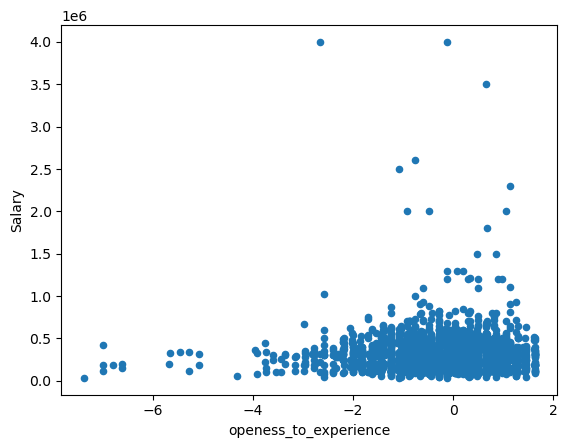

In [147]:
salary_eda.plot(kind='scatter',x='openess_to_experience',y='Salary')

If we see, the more the openess_to_experience the more the salary.

Also,Let us Normalise Openness to experience on a scale of 1 to 10.

In [148]:
salary_eda['openess_to_experience']= (10*(salary_eda['openess_to_experience'] - min(salary_eda['openess_to_experience'])))/( max(salary_eda['openess_to_experience']) -min(salary_eda['openess_to_experience']))

Let us see the distrubution of Salary w.r.t domain

<Axes: xlabel='Domain', ylabel='Salary'>

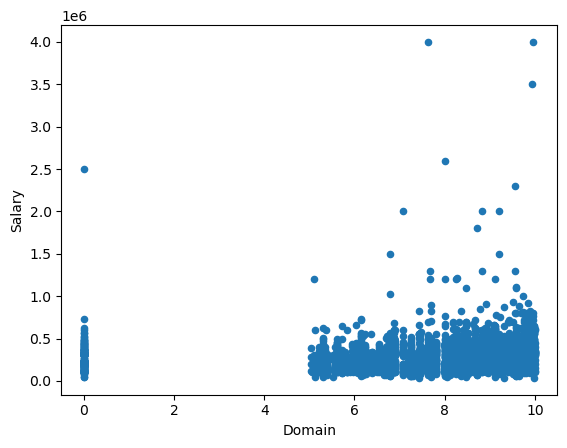

In [149]:
salary_eda.plot(kind='scatter',x='Domain',y='Salary')

Now let us have a look at the relationship between the degree and the salary.

<Axes: xlabel='Degree', ylabel='Salary'>

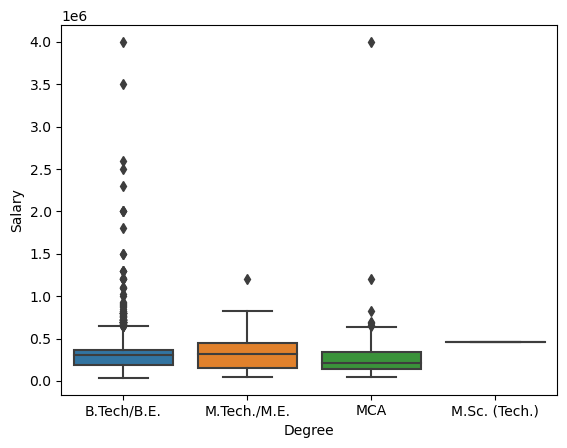

In [150]:
sns.boxplot(x='Degree',y='Salary',data =salary_eda)

If we see the data, the median salary of M.Sc grads is higher than the median salary of M.Tech/M.E. grads,which in turn is higher than B.Tech/B.E. grads,which in turn is higher than MCA grads.

Let us check the distribution of slary w.r.t specialization

<Axes: xlabel='Specialization', ylabel='Salary'>

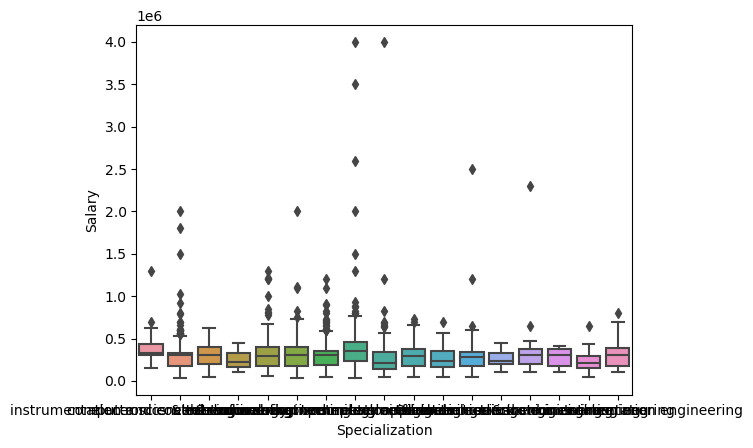

In [151]:
sns.boxplot(x='Specialization',y='Salary',data =salary_eda)

The median salary varies slightly w.r.t specialization

Let us check the distribution of slary w.r.t Graduation Year

(2005.0, 2020.0)

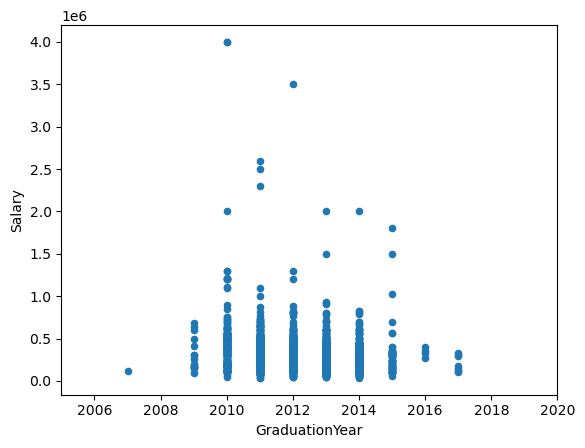

In [152]:
salary_eda.plot(kind='scatter',x='GraduationYear',y='Salary')
plt.xlim(2005, 2020)

A little variation can be seen in the salary w.r.t graduation year

In [153]:
print('Median Salary in 2016 is' ,salary_eda[salary_eda['GraduationYear']==2016]['Salary'].median())

Median Salary in 2016 is 337500.0


In [154]:
print('Median Salary in 2017 is', salary_eda[salary_eda['GraduationYear']==2017]['Salary'].median())

Median Salary in 2017 is 180000.0


If we see the median salary in 2017 is far less than the median salary in 2017. This looks quite anomalous as the median salary in 2017 should have been closer to the median salary of 2016.Whether to keep the data of 2017, we will decide it based on the outputs obtained by our models.

Let us the check the variation with college tier

<Axes: xlabel='CollegeTier', ylabel='Salary'>

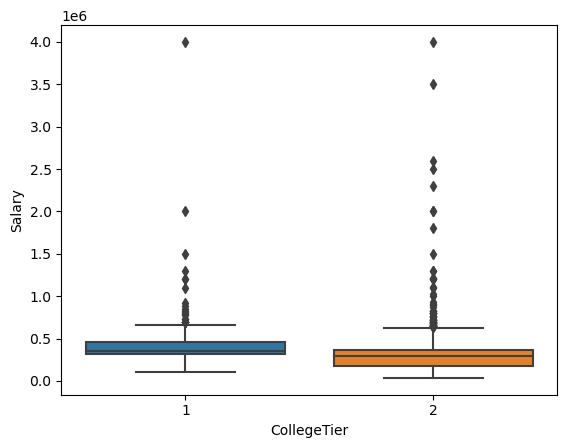

In [155]:
sns.boxplot(x='CollegeTier',y='Salary',data=salary_eda)

Tier 1 college graduates have a little higher median salary but the number of people with very high salary is more for Tier2 colleges

Similarly let us check the variation w.r.t college city tier

<Axes: xlabel='CollegeCityTier', ylabel='Salary'>

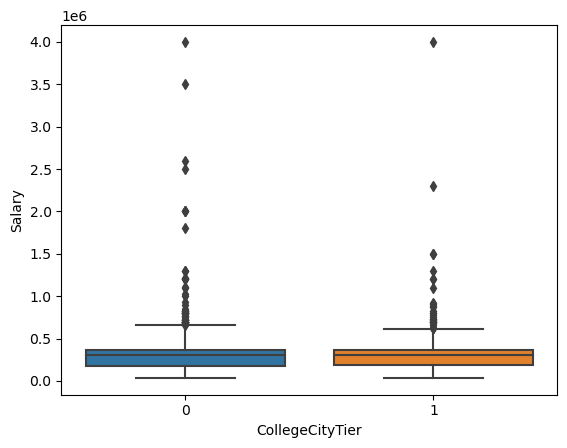

In [156]:
sns.boxplot(x='CollegeCityTier',y='Salary',data=salary_eda)

Median salary w.r.t to college city tier is almost identical

# CONCLUSION

### From the above EDA we will select the following features for our model development:

Numerical Features: 10percentage,12percentage,collegeGPA,personality score,aptitude score,openess_to_experience,Domain,GraduationYear and Year of Birth

Categorical Features : Gender,Degree,CollegeTier,Specialization and CollegeCityTier

So let us built our final data set for modelling

In [157]:
salary_eda = salary_eda[['10percentage','12percentage','collegeGPA','personality score','aptitude score','openess_to_experience','Domain','GraduationYear','Year of Birth','Gender','Degree','CollegeTier','Specialization','CollegeCityTier','Salary']]

In [158]:
salary_eda.head()

,10percentage,12percentage,collegeGPA,personality score,aptitude score,openess_to_experience,Domain,GraduationYear,Year of Birth,Gender,Degree,CollegeTier,Specialization,CollegeCityTier,Salary
0,87.80,84.00,73.82,7.085299,7.814026,8.510643,8.472776,2013,1990,f,B.Tech/B.E.,1,instrumentation and control engineering,1,445000
1,57.00,64.50,65.00,7.367186,2.964951,7.872395,6.711875,2014,1990,m,B.Tech/B.E.,2,computer science & engineering,0,110000
2,77.33,85.17,61.94,7.499946,4.663684,7.870618,9.123741,2011,1989,m,B.Tech/B.E.,2,electronics & telecommunications,0,255000
3,84.30,86.00,80.40,6.515380,6.936067,8.723392,9.950490,2013,1991,m,B.Tech/B.E.,1,computer science & engineering,1,420000
4,82.00,75.00,64.30,5.331208,4.608160,8.396829,6.392573,2012,1990,f,B.Tech/B.E.,2,biotechnology,1,200000


Let us convert the columns CollegeTier and CollegeCityTier into categorical columns

In [159]:
salary_eda[['CollegeTier','CollegeCityTier']]=salary_eda[['CollegeTier','CollegeCityTier']].astype(str)

C:\Users\HP\AppData\Local\Temp\ipykernel_21768\3680828101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_eda[['CollegeTier','CollegeCityTier']]=salary_eda[['CollegeTier','CollegeCityTier']].astype(str)


In [160]:
for i in range(salary_eda.shape[0]):
    if salary_eda.loc[i,'CollegeTier'] =='1':
        salary_eda.loc[i,'CollegeTier'] = 'Tier1College'
    else:
        salary_eda.loc[i,'CollegeTier'] = 'Tier2College'
        
    if salary_eda.loc[i,'CollegeCityTier'] =='0':
        salary_eda.loc[i,'CollegeCityTier'] = 'CityTier0'
    else:
        salary_eda.loc[i,'CollegeCityTier'] = 'CityTier1'

In [161]:
salary_eda.head()

,10percentage,12percentage,collegeGPA,personality score,aptitude score,openess_to_experience,Domain,GraduationYear,Year of Birth,Gender,Degree,CollegeTier,Specialization,CollegeCityTier,Salary
0,87.80,84.00,73.82,7.085299,7.814026,8.510643,8.472776,2013,1990,f,B.Tech/B.E.,Tier1College,instrumentation and control engineering,CityTier1,445000
1,57.00,64.50,65.00,7.367186,2.964951,7.872395,6.711875,2014,1990,m,B.Tech/B.E.,Tier2College,computer science & engineering,CityTier0,110000
2,77.33,85.17,61.94,7.499946,4.663684,7.870618,9.123741,2011,1989,m,B.Tech/B.E.,Tier2College,electronics & telecommunications,CityTier0,255000
3,84.30,86.00,80.40,6.515380,6.936067,8.723392,9.950490,2013,1991,m,B.Tech/B.E.,Tier1College,computer science & engineering,CityTier1,420000
4,82.00,75.00,64.30,5.331208,4.608160,8.396829,6.392573,2012,1990,f,B.Tech/B.E.,Tier2College,biotechnology,CityTier1,200000


## Finally let us save this data

In [162]:
salary_eda.to_csv('final_salary_prediction_data.csv')